In [41]:
import interpret
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pipeline.log_reg import FeaturePredictor

In [42]:
import os 
os.chdir('C:/Users/Louis/Documents/4thYearUofT/MIE368/fakeNewsPrediction/prediction_tool/')

# from pipeline.feature_extraction import *
file = './data/features_with_pos_sqrtfreq.csv'
features = ["count","brunetIndex","honoreStatistic","questionRatio","articleLength","avgWordLength",'$_sqrtfreq',
 "''_sqrtfreq",
 '._sqrtfreq',
 ':_sqrtfreq',
 'CC_sqrtfreq',
 'CD_sqrtfreq',
 'DT_sqrtfreq',
 'FW_sqrtfreq',
 'IN_sqrtfreq',
 'JJR_sqrtfreq',
 'JJ_sqrtfreq',
 'MD_sqrtfreq',
 'NNP_sqrtfreq',
 'NNS_sqrtfreq',
 'NN_sqrtfreq',
 'PDT_sqrtfreq',
 'PRP$_sqrtfreq',
 'PRP_sqrtfreq',
 'RBR_sqrtfreq',
 'RB_sqrtfreq',
 'RP_sqrtfreq',
 'SYM_sqrtfreq',
 'VBD_sqrtfreq',
 'VBP_sqrtfreq',
 'VBZ_sqrtfreq',
 'VB_sqrtfreq',
 'WP_sqrtfreq',
 'WRB_sqrtfreq']


In [43]:
feats = FeaturePredictor(file=file, features = features, scaler = StandardScaler())
mdl, mdl_score = feats.model()
print(mdl_score)

0.6689847009735744


c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
scaler = feats.getscaler()

In [45]:
#scaled
X_train, X_test, y_train, y_test = feats.data_loader()

{'count': 1.0717197368320406, 'brunetIndex': 0.7705021084352777, 'honoreStatistic': 1.2935112282492722, 'questionRatio': 0.10079657354866627, 'articleLength': 1.2272813233872901, 'avgWordLength': 0.27704831330450325, '$_sqrtfreq': 0.1714850770857496, "''_sqrtfreq": 0.07942315965365397, '._sqrtfreq': 0.0, ':_sqrtfreq': 0.0, 'CC_sqrtfreq': 0.09762474370118218, 'CD_sqrtfreq': 0.40824635627191946, 'DT_sqrtfreq': 0.842811550452577, 'FW_sqrtfreq': 0.1155173902831764, 'IN_sqrtfreq': 0.2335898797791504, 'JJR_sqrtfreq': 0.1106289188677426, 'JJ_sqrtfreq': 0.1386142218141411, 'MD_sqrtfreq': 0.0892191945133034, 'NNP_sqrtfreq': 1.8591190705397684, 'NNS_sqrtfreq': 0.0033598498982855937, 'NN_sqrtfreq': 0.9902852237930702, 'PDT_sqrtfreq': 0.0004955730437832492, 'PRP$_sqrtfreq': 0.05331929067307052, 'PRP_sqrtfreq': 0.06386005590190574, 'RBR_sqrtfreq': 0.017669256524461066, 'RB_sqrtfreq': 0.03385848117029005, 'RP_sqrtfreq': 0.05403605512823353, 'SYM_sqrtfreq': 0.09886088577041527, 'VBD_sqrtfreq': 0.1611

Text(0.5, 1.0, 'Magnitude of Logistic Regression Coefficients with scaled features')

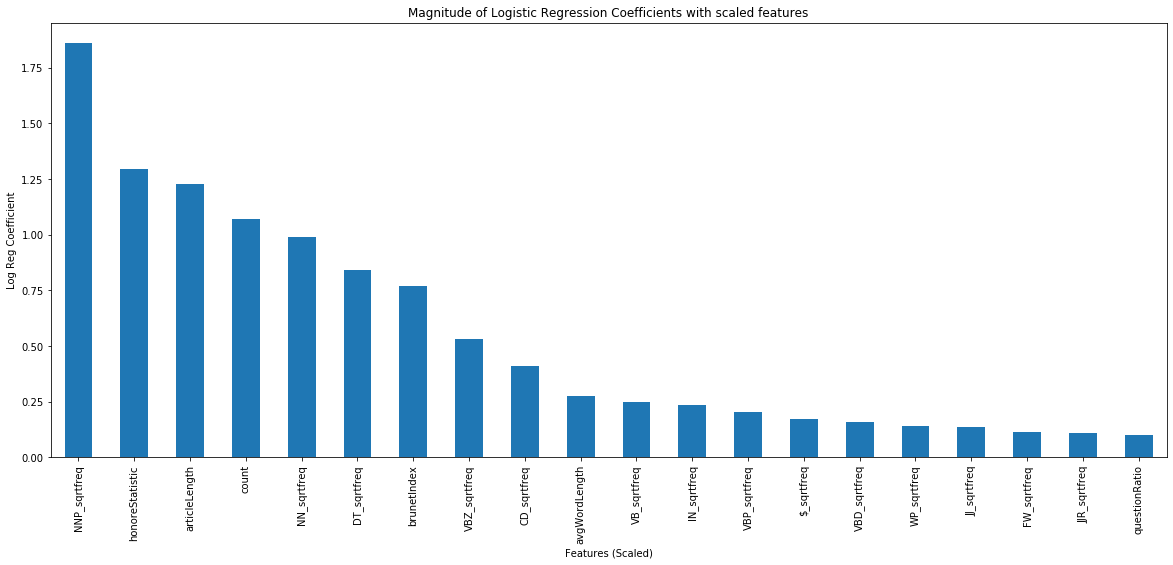

In [46]:
d = {}
for (i,col) in enumerate(X_train_t.columns):
    d[col] = np.abs(mdl.coef_[0][i])
    
print(d)
import seaborn as sns
df = pd.Series(d)
df = df.nlargest( n=20, keep='first')
df = df.sort_values(ascending=False)
ax = df.plot(kind='bar', figsize = (20,8))
ax.set_xlabel('Features (Scaled)')
ax.set_ylabel('Log Reg Coefficient')
ax.set_title('Magnitude of Logistic Regression Coefficients with scaled features')

In [47]:
feats2 = FeaturePredictor(file=file, features = features)
mdl2, mdl_score2 = feats2.model()
print(mdl_score2)
X_train_t, X_test_t, y_train_t, y_test_t = feats2.data_loader()


c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6675938803894298


In [48]:
from sklearn.metrics import recall_score, precision_score
y_pred = mdl.predict(X_test)
print('recall: ', recall_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))

recall:  0.6735294117647059
precision:  0.6432584269662921


In [49]:
from interpret import show
from interpret.perf import ROC
print('X_train: ',X_train.shape)
blackbox_perf = ROC(mdl.predict_proba).explain_perf(X_test, y_test, name='Logistic Regression')
show(blackbox_perf)

X_train:  (1459, 34)


<!-- http://127.0.0.1:7969/1146486431928/ -->

In [55]:
X_train = pd.DataFrame(X_train, columns = X_train_t.columns)
X_test = pd.DataFrame(X_test, columns = X_test_t.columns)


In [56]:
pd.Series(mdl.coef_[0], index = list(X_train.columns)).sort_values()

NNP_sqrtfreq      -1.859119
honoreStatistic   -1.293511
articleLength     -1.227281
NN_sqrtfreq       -0.990285
DT_sqrtfreq       -0.842812
VBZ_sqrtfreq      -0.532452
VB_sqrtfreq       -0.246779
IN_sqrtfreq       -0.233590
VBP_sqrtfreq      -0.204960
$_sqrtfreq        -0.171485
VBD_sqrtfreq      -0.161136
JJ_sqrtfreq       -0.138614
FW_sqrtfreq       -0.115517
JJR_sqrtfreq      -0.110629
questionRatio     -0.100797
CC_sqrtfreq       -0.097625
''_sqrtfreq       -0.079423
:_sqrtfreq         0.000000
._sqrtfreq         0.000000
PDT_sqrtfreq       0.000496
NNS_sqrtfreq       0.003360
RBR_sqrtfreq       0.017669
RB_sqrtfreq        0.033858
PRP$_sqrtfreq      0.053319
RP_sqrtfreq        0.054036
PRP_sqrtfreq       0.063860
WRB_sqrtfreq       0.067745
MD_sqrtfreq        0.089219
SYM_sqrtfreq       0.098861
WP_sqrtfreq        0.142103
avgWordLength      0.277048
CD_sqrtfreq        0.408246
brunetIndex        0.770502
count              1.071720
dtype: float64

In [59]:
X_train_weighting = X_train.copy()
for i,col in enumerate(X_train.columns):
    X_train_weighting[col] = X_train[col].apply(lambda x: x* mdl.coef_[0][i])

In [60]:
X_train_weighting.mean(axis=0).sort_values()

honoreStatistic   -1.150173e-15
DT_sqrtfreq       -6.971710e-16
avgWordLength     -2.419244e-16
JJ_sqrtfreq       -8.909987e-17
VBD_sqrtfreq      -4.914535e-17
SYM_sqrtfreq      -3.122027e-17
MD_sqrtfreq       -2.644770e-17
WP_sqrtfreq       -2.349011e-17
VB_sqrtfreq       -1.976562e-17
VBP_sqrtfreq      -1.299319e-17
count             -8.218238e-18
RB_sqrtfreq       -7.735511e-18
VBZ_sqrtfreq      -7.447778e-18
RP_sqrtfreq       -4.489593e-18
FW_sqrtfreq       -3.519384e-18
WRB_sqrtfreq      -2.368450e-18
RBR_sqrtfreq      -2.039103e-18
articleLength     -7.229005e-19
PDT_sqrtfreq      -1.264779e-19
:_sqrtfreq         0.000000e+00
._sqrtfreq         0.000000e+00
NNS_sqrtfreq       4.265470e-20
PRP_sqrtfreq       1.341171e-18
questionRatio      2.206749e-18
''_sqrtfreq        5.489526e-18
CD_sqrtfreq        1.374462e-17
PRP$_sqrtfreq      1.481946e-17
IN_sqrtfreq        2.104972e-17
CC_sqrtfreq        2.439225e-17
JJR_sqrtfreq       2.966448e-17
brunetIndex        3.631624e-17
$_sqrtfr

In [61]:
X_train_weighting.var(axis=0).sort_values()

._sqrtfreq         0.000000e+00
:_sqrtfreq         0.000000e+00
PDT_sqrtfreq       2.457611e-07
NNS_sqrtfreq       1.129633e-05
RBR_sqrtfreq       3.124168e-04
RB_sqrtfreq        1.147183e-03
PRP$_sqrtfreq      2.844897e-03
RP_sqrtfreq        2.921898e-03
PRP_sqrtfreq       4.080904e-03
WRB_sqrtfreq       4.592589e-03
''_sqrtfreq        6.312365e-03
MD_sqrtfreq        7.965524e-03
CC_sqrtfreq        9.537127e-03
SYM_sqrtfreq       9.780178e-03
questionRatio      1.016692e-02
JJR_sqrtfreq       1.224715e-02
FW_sqrtfreq        1.335342e-02
JJ_sqrtfreq        1.922708e-02
WP_sqrtfreq        2.020717e-02
VBD_sqrtfreq       2.598254e-02
$_sqrtfreq         2.942730e-02
VBP_sqrtfreq       4.203747e-02
IN_sqrtfreq        5.460166e-02
VB_sqrtfreq        6.094188e-02
avgWordLength      7.680841e-02
CD_sqrtfreq        1.667794e-01
VBZ_sqrtfreq       2.836994e-01
brunetIndex        5.940807e-01
DT_sqrtfreq        7.108185e-01
NN_sqrtfreq        9.813374e-01
count              1.149371e+00
articleL

In [62]:
X_train_weighting.corr()

,count,brunetIndex,honoreStatistic,questionRatio,articleLength,avgWordLength,$_sqrtfreq,''_sqrtfreq,._sqrtfreq,:_sqrtfreq,...,RBR_sqrtfreq,RB_sqrtfreq,RP_sqrtfreq,SYM_sqrtfreq,VBD_sqrtfreq,VBP_sqrtfreq,VBZ_sqrtfreq,VB_sqrtfreq,WP_sqrtfreq,WRB_sqrtfreq
count,1.000000,0.961547,-0.635029,-0.001615,-0.959775,0.083602,-0.214594,-0.055646,NaN,NaN,...,0.036022,0.265983,0.234390,0.069503,-0.094241,-0.130891,-0.127191,-0.197355,-0.011987,0.302595
brunetIndex,0.961547,1.000000,-0.630359,0.002092,-0.997632,0.074395,-0.234014,-0.050299,NaN,NaN,...,0.041939,0.260225,0.243381,0.063440,-0.102756,-0.127527,-0.124053,-0.191203,-0.007873,0.300499
honoreStatistic,-0.635029,-0.630359,1.000000,0.064091,0.634735,-0.392302,0.301201,0.059000,NaN,NaN,...,-0.051551,-0.513064,-0.315372,-0.052619,0.420417,0.540725,0.556451,0.543837,-0.002587,-0.282118
questionRatio,-0.001615,0.002092,0.064091,1.000000,0.003270,0.016684,-0.039109,-0.016342,NaN,NaN,...,-0.016999,-0.052246,-0.043412,-0.027678,0.093862,0.026014,0.069161,0.030332,-0.019901,-0.031677
articleLength,-0.959775,-0.997632,0.634735,0.003270,1.000000,-0.053389,0.237326,0.050875,NaN,NaN,...,-0.042584,-0.262413,-0.249884,-0.066635,0.105830,0.123931,0.128035,0.193564,0.008603,-0.306798
avgWordLength,0.083602,0.074395,-0.392302,0.016684,-0.053389,1.000000,-0.012213,-0.010945,NaN,NaN,...,0.000076,0.127008,0.024779,0.006567,-0.328268,-0.536109,-0.418852,-0.209849,0.010496,-0.008310
$_sqrtfreq,-0.214594,-0.234014,0.301201,-0.039109,0.237326,-0.012213,1.000000,0.014684,NaN,NaN,...,-0.043368,-0.170189,-0.121417,0.011480,0.177455,0.103682,0.089971,0.140207,0.023943,-0.161683
''_sqrtfreq,-0.055646,-0.050299,0.059000,-0.016342,0.050875,-0.010945,0.014684,1.000000,NaN,NaN,...,-0.058541,-0.040555,-0.006046,0.010360,0.004847,0.005752,0.014245,0.013477,0.002140,-0.062833
._sqrtfreq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
:_sqrtfreq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
from interpret.blackbox import ShapKernel
import numpy as np

background_val = np.median(X_train, axis=0).reshape(1, -1)
shap = ShapKernel(predict_fn=mdl.predict, data=background_val, feature_names=X_train.columns)
shap_local = shap.explain_local(X_test[:5], y_test[:5], name='SHAP')
show(shap_local)

c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\shap\explainers\kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\shap\explainers\kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\shap\explainers\kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!

c:\users\louis\appdata\local\programs\python\python36\lib\site-packages\shap\explainers\kernel.py:555: UserWarning:

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a co

<!-- http://127.0.0.1:7969/1146626685584/ -->

In [64]:
from sklearn.metrics import classification_report
y_pred = pd.Series(mdl.predict(X_test), index=y_test.index)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.68       379
         1.0       0.64      0.67      0.66       340

    accuracy                           0.67       719
   macro avg       0.67      0.67      0.67       719
weighted avg       0.67      0.67      0.67       719



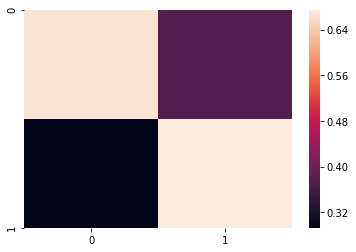

In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
C = confusion_matrix(y_test, y_pred)
C = C / C.astype(np.float).sum(axis=1)
sns.heatmap(C, )

In [66]:
C

array([[0.66490765, 0.37352941],
       [0.29287599, 0.67352941]])

In [68]:
y_test_t = pd.Series(mdl.predict(X_test), index=y_test.index)

y_pred = y_test_t 

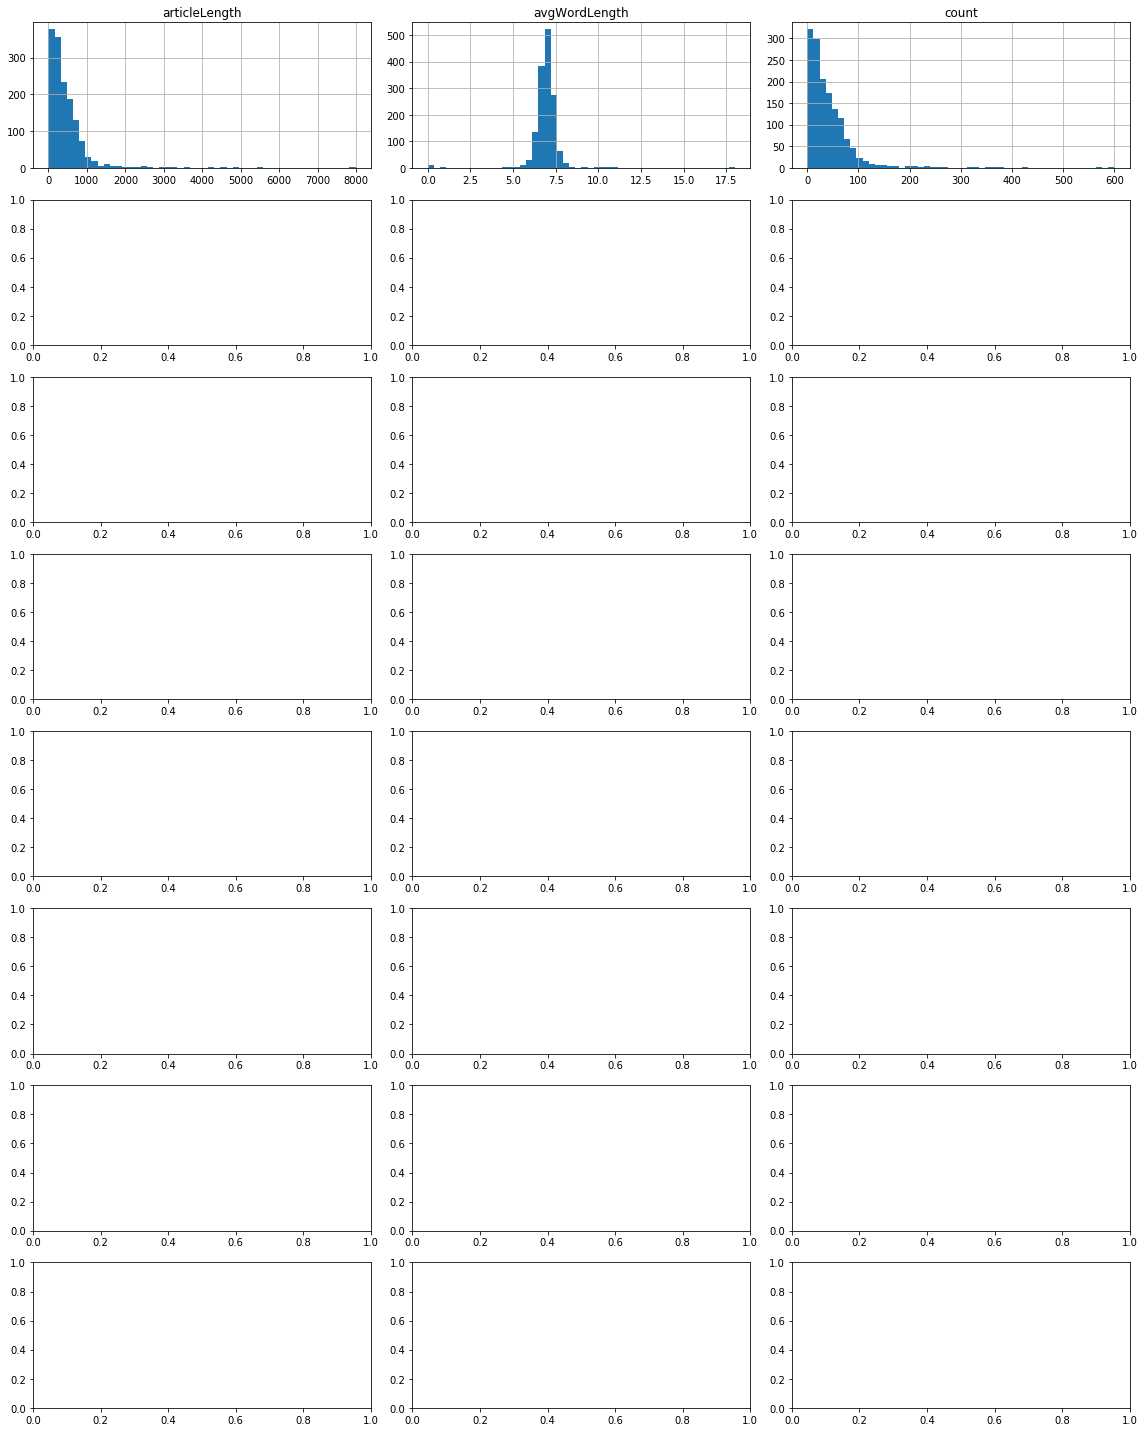

In [73]:
continuous_variables = ['brunetIndex', 'honoreStatistic', 'questionRatio',
        '$_sqrtfreq', "''_sqrtfreq",
       '._sqrtfreq', ':_sqrtfreq', 'CC_sqrtfreq', 'CD_sqrtfreq', 'DT_sqrtfreq',
       'FW_sqrtfreq', 'IN_sqrtfreq', 'JJR_sqrtfreq', 'JJ_sqrtfreq',
       'MD_sqrtfreq', 'NNP_sqrtfreq', 'NNS_sqrtfreq', 'NN_sqrtfreq',
       'PDT_sqrtfreq', 'PRP$_sqrtfreq', 'PRP_sqrtfreq', 'RBR_sqrtfreq',
       'RB_sqrtfreq', 'RP_sqrtfreq', 'SYM_sqrtfreq', 'VBD_sqrtfreq',
       'VBP_sqrtfreq', 'VBZ_sqrtfreq', 'VB_sqrtfreq', 'WP_sqrtfreq',
       'WRB_sqrtfreq']

lex = ['articleLength', 'avgWordLength','count', ]

import matplotlib.pyplot as plt

# row, col, figsize
fig, ax = plt.subplots(8,3, figsize=(16, 20))
fig.subplots_adjust(bottom=0.4, top=1.5)
ax = ax.ravel()
 # Or equivalently,  "plt.tight_layout()"


for i, col in enumerate(lex):
    
    # Plot the feature when y is 1
    X_train_t.hist(col, ax=ax[i], bins=50)
    ax[i].set_title('{}'.format(col))
    
    # Write code below to plot the feature when y is 0
    # -------------------------------------------------------------------------

#     X_train_t[y_train_t == 0 ].hist(col, ax=ax[2*i + 1], bins=50)
#     ax[2*i + 1].set_title('{} [y==0]'.format(col))
    
    
    # -------------------------------------------------------------------------
fig.tight_layout()
